## Descrição dos dados:

O dicionário de dados detalhado é fornecido abaixo:

* d=Definições para os termos que você listou

* Oil Rate(Taxa de óleo) - O volume de óleo produzido em um determinado período, normalmente medido em barris por dia (BPD).

* Water Rate(Taxa de água) - O volume de água produzido junto com óleo e gás, geralmente expresso em barris por dia.

* Gas Rate(Taxa de gás) - O volume de gás produzido de um poço de petróleo em um determinado período, geralmente medido em pés cúbicos por dia (CFPD) ou milhões de pés cúbicos por dia (MMCFD).

* Gas Oil Ratio(GOR\Taxa de gás-óleo) - A proporção de gás produzido para óleo produzido de um poço de petróleo, indicando as quantidades relativas de cada fase sendo extraída.

* Tubing Temperature(Temperatura da tubulação) - A temperatura dentro da tubulação de produção dentro de um poço de petróleo, que pode afetar as propriedades do fluido e as taxas de fluxo.

* Tubing Pressure(Pressão da tubulação) - A pressão dentro da tubulação de produção, importante para monitorar o desempenho e a segurança do poço.

* Differential Pressure(Pressão diferencial) - A diferença entre duas leituras de pressão feitas em pontos diferentes dentro de um sistema, útil para entender a dinâmica do fluxo e a integridade do sistema.

* Temperature(Temperatura) - Uma medição geral relacionada ao calor dentro de vários componentes de um sistema de extração.

* Pressure(Pressão) - Uma medição fundamental em qualquer processo industrial, referindo-se à pressão atmosférica, pressão do reservatório, pressão da tubulação, etc., dependendo de onde é medida.

**Importando bibliotecas necessárias**

In [2]:
# Data manupulation libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Visualization libraries 
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning models libraries 
from sklearn.tree import DecisionTreeClassifier

# Scoring libraries (check your results)
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 

# Library to split data
from sklearn.model_selection import train_test_split


# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, roc_auc_score


**Carregando e Explorando os Dados**

In [3]:
# Use a livraria pandas para importar os dados e nomeie a varial 'roxar_df'
# Depois inspeccione com a funcao 'head()'
#Devido a questões de familiarização com o termo, preferiu-se usar o nome data para conter o dataframe.
data = pd.read_csv(r"C:\Users\j040m\Music\CURSO\Modulo 3- Floresta Aleatória\RoxarNew.csv")

**Visualizando as primeiras e últimas 5 linhas do conjunto de dados**

In [4]:
data.head()

,OilRate,WaterRate,GasRate,GOR,TBGTemp,TBGPress,DiffPress,Temperature,Pressure
0,4124,520,6538,1585,212,583,659,126,216
1,4125,517,6544,1587,212,584,663,129,216
2,3848,421,6276,1631,212,582,858,180,224
3,3856,409,3860,1001,212,582,59,105,208
4,3915,406,4678,1195,212,583,78,75,210


In [5]:
data.tail()

,OilRate,WaterRate,GasRate,GOR,TBGTemp,TBGPress,DiffPress,Temperature,Pressure
930,2175,207,2840,1306,195,268,2,74,280
931,1755,92,1126,641,129,234,2,74,284
932,2447,214,3413,1395,201,240,2,74,270
933,2413,853,3008,1247,195,259,2,74,282
934,2422,223,3032,1252,195,271,20,84,285


**Entendendo a forma do conjunto de dados**

In [6]:
# Verifica o shape dos dados
print(f'Shape dos dados: {data.shape}\n')
 
print(f'Esta base de dados tem {data.shape[0]} observações e {data.shape[1]} variaveis.')

Shape dos dados: (935, 9)

Esta base de dados tem 935 observações e 9 variaveis.


**Verificando os valores nulos e duplicados nos dados**

In [7]:
data.isnull().values.any()

False

In [8]:
data.isnull().sum()

OilRate        0
WaterRate      0
GasRate        0
GOR            0
TBGTemp        0
TBGPress       0
DiffPress      0
Temperature    0
Pressure       0
dtype: int64

In [9]:
data.duplicated().sum().any()

False

* Observa-se que não existem valores nulos e duplicados

**Verificando os tipos de dados das variaveis para o conjunto de dados**

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   OilRate      935 non-null    int64 
 1   WaterRate    935 non-null    int64 
 2   GasRate      935 non-null    int64 
 3   GOR          935 non-null    int64 
 4   TBGTemp      935 non-null    object
 5   TBGPress     935 non-null    object
 6   DiffPress    935 non-null    int64 
 7   Temperature  935 non-null    int64 
 8   Pressure     935 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 65.9+ KB


* Há 7 variaveis numéricas do tipo int e 2 de tipo de objeto.
* As variaveis *TBGTemp* e *TBGPress* estão no formato incorreto sendo que as mesmas devem ser do tipo numerico

**verificando o resumo estatístico dos dados.**

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
OilRate,935.0,3400.547594,837.087247,1.0,2643.5,3552.0,4130.5,4522.0
WaterRate,935.0,311.301604,198.390745,0.0,155.5,381.0,457.0,1351.0
GasRate,935.0,3853.829947,1894.257567,-54.0,2385.5,3286.0,5716.5,7404.0
GOR,935.0,1079.660963,384.421604,-34.0,840.5,1036.0,1400.5,2498.0
DiffPress,935.0,423.197861,760.475776,0.0,40.5,124.0,404.0,4904.0
Temperature,935.0,108.144385,38.660792,42.0,75.0,101.0,137.0,205.0
Pressure,935.0,258.279144,52.044148,50.0,208.0,273.0,298.0,480.0


In [12]:
# Verificando a quantidade de valores em todas as variavel
for i in data.columns:
    print(i,len(data[i].unique()))

OilRate 706
WaterRate 343
GasRate 823
GOR 582
TBGTemp 41
TBGPress 152
DiffPress 477
Temperature 146
Pressure 175


**Verificando as variaveis TBGTemp e TBGPress**

In [13]:
data['TBGTemp'].unique()

array(['212', '211', '77', '208', '201', '210', '209', '206', '103',
       '207', '203', 'Error', '85', '199', '82', '204', '205', '78', '80',
       '193', '196', '198', '200', '202', '93', '184', '197', '106', '94',
       '192', '186', '84', '172', '183', '187', '87', '189', '195', '194',
       '185', '129'], dtype=object)

In [14]:
data['TBGPress'].unique()

array(['583', '584', '582', '198', '430', '1010', '548', '551', '556',
       '557', '566', '562', '565', '524', '521', '520', '530', '532',
       '517', '519', '523', '522', '376', '357', '356', '351', '355',
       '361', '364', '359', '360', '363', '350', '349', '354', '347',
       '352', '348', '345', '353', '346', '344', '343', '341', '338',
       '334', '331', '332', '194', '328', '325', '329', '326', '330',
       '327', '337', '333', '324', '321', '323', '322', '320', '318',
       '319', '317', '316', '314', '315', '312', '310', '304', '313',
       '311', '306', '305', '303', '308', '309', '307', '302', 'Error',
       '285', '290', '292', '297', '294', '404', '276', '281', '279',
       '284', '287', '286', '300', '269', '280', '283', '296', '282',
       '293', '291', '295', '289', '288', '277', '278', '218', '274',
       '275', '273', '272', '251', '271', '470', '270', '255', '268',
       '265', '266', '298', '299', '177', '573', '46', '217', '245',
       '248', '253

* É observado que nas duas variaveis temos a entrada 'Error' que por sua vez não é um número, neste caso, devemos eliminar este valor e substitui-lo pelo média,mediana ou moda

**Removendo o erro nas variaveis TBGTemp e TBGPress**

In [15]:
# replacing values with nan
data['TBGTemp'] = data['TBGTemp'].replace(['Error'],np.nan)
data['TBGPress'] = data['TBGPress'].replace(['Error'],np.nan)

**Verificando novamente os valores em falta nos dados**

In [16]:
# vamos verificar novamente os valores ausentes nos dados
data.isna().sum()

OilRate        0
WaterRate      0
GasRate        0
GOR            0
TBGTemp        1
TBGPress       1
DiffPress      0
Temperature    0
Pressure       0
dtype: int64

**Convertendo para int e Imputando os valores em falta nos dados**

In [17]:
# changing the data type to float
data['TBGTemp'] = data['TBGTemp'].astype(float)
data['TBGPress'] = data['TBGPress'].astype(float)

In [18]:
data['TBGTemp'] = data['TBGTemp'].fillna(data['TBGTemp'].median())
data['TBGPress'] = data['TBGPress'].fillna(data['TBGPress'].median())

In [19]:
data['TBGTemp'] = data['TBGTemp'].astype('int64')
data['TBGPress'] = data['TBGPress'].astype('int64')

In [20]:
# vamos verificar novamente os valores ausentes nos dados
data.isna().sum()

OilRate        0
WaterRate      0
GasRate        0
GOR            0
TBGTemp        0
TBGPress       0
DiffPress      0
Temperature    0
Pressure       0
dtype: int64

In [21]:
# vamos verificar novamente os tipos de dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   OilRate      935 non-null    int64
 1   WaterRate    935 non-null    int64
 2   GasRate      935 non-null    int64
 3   GOR          935 non-null    int64
 4   TBGTemp      935 non-null    int64
 5   TBGPress     935 non-null    int64
 6   DiffPress    935 non-null    int64
 7   Temperature  935 non-null    int64
 8   Pressure     935 non-null    int64
dtypes: int64(9)
memory usage: 65.9 KB


# Análise exploratória de dados ##

## Análise de Dados Univariada

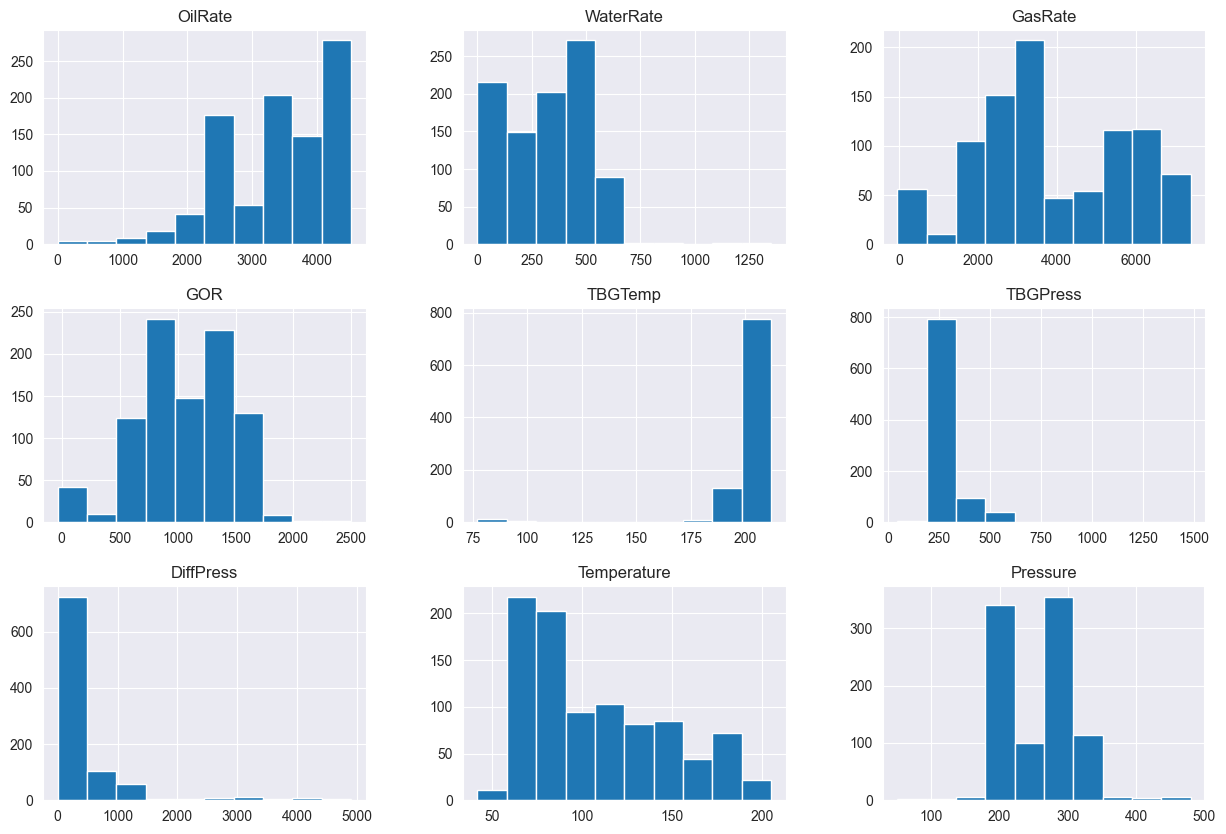

In [22]:
sns.set_style("darkgrid")
data.hist(figsize=(15, 10))
plt.show()

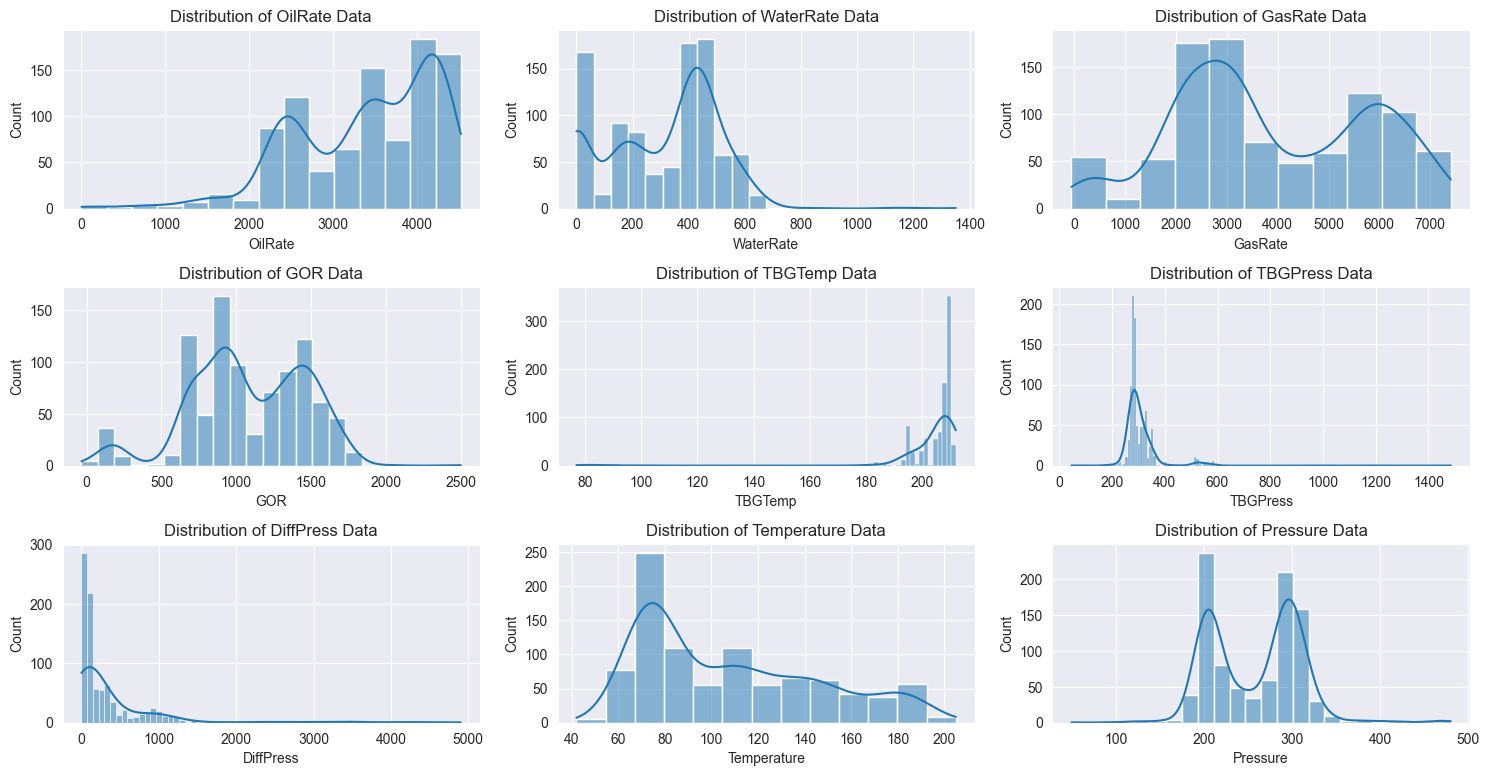

In [23]:
plt.figure(figsize=(15,10))
for i,col in enumerate(data.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(data[col],kde=True)
    plt.tight_layout()
    plt.plot()

**Observação na OilRate**

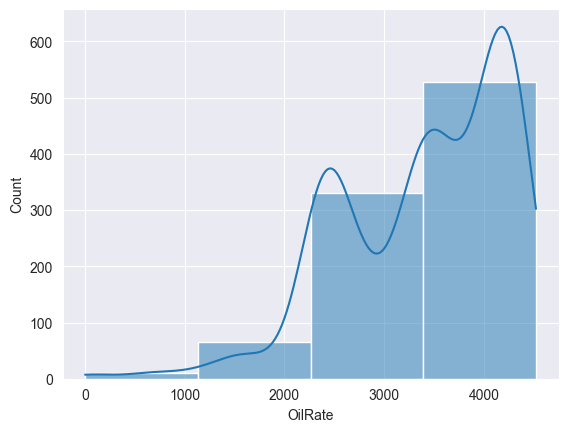

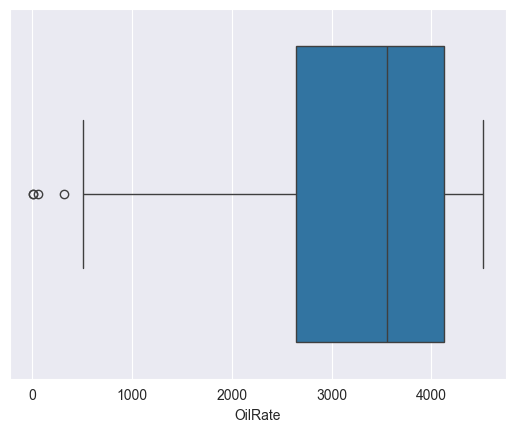

In [24]:
data_not_unrated=data[data['OilRate']!=0]
sns.histplot(data=data_not_unrated,x='OilRate',bins=4, stat='count', kde=True)
plt.show()
sns.boxplot(data = data_not_unrated, x='OilRate')
plt.show()

**Observação na WaterRate**

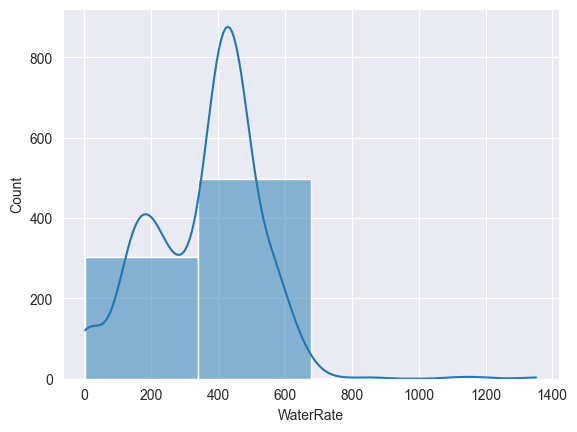

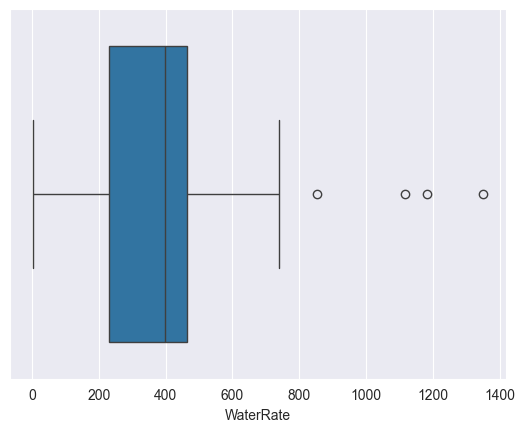

In [25]:
data_not_unrated=data[data['WaterRate']!=0]
sns.histplot(data=data_not_unrated,x='WaterRate',bins=4, stat='count', kde=True)
plt.show()
sns.boxplot(data = data_not_unrated, x='WaterRate')
plt.show()

**Observação na GasRate**

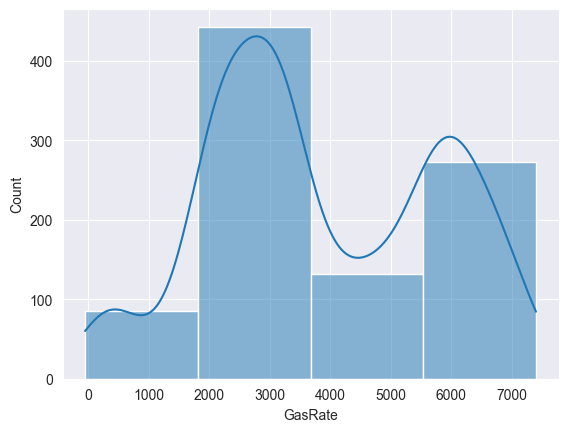

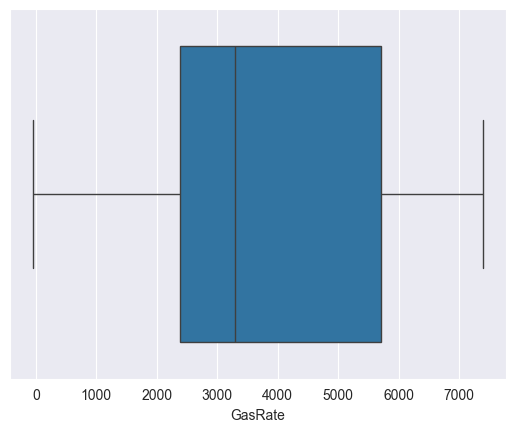

In [26]:
data_not_unrated=data[data['GasRate']!=0]
sns.histplot(data=data_not_unrated,x='GasRate',bins=4, stat='count', kde=True)
plt.show()
sns.boxplot(data = data_not_unrated, x='GasRate')
plt.show()

**Observação na GOR**

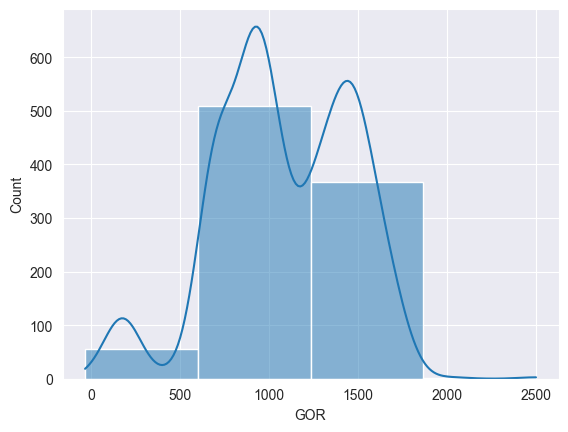

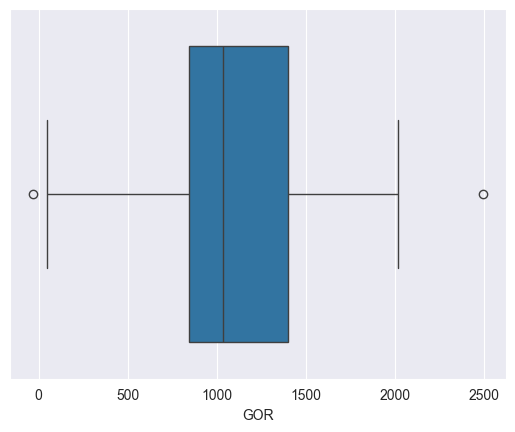

In [27]:
data_not_unrated=data[data['GOR']!=0]
sns.histplot(data=data_not_unrated,x='GOR',bins=4, stat='count', kde=True)
plt.show()
sns.boxplot(data = data_not_unrated, x='GOR')
plt.show()

**Observação na TBGTemp**

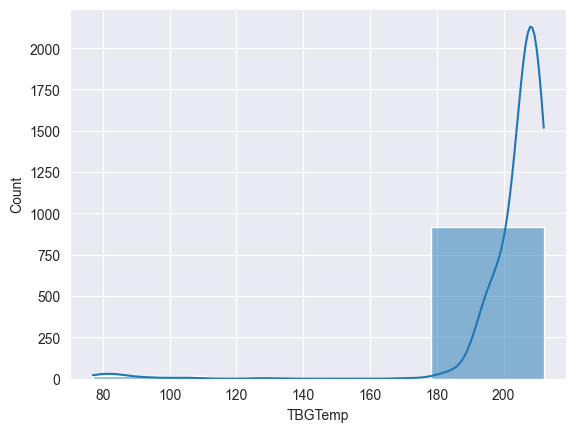

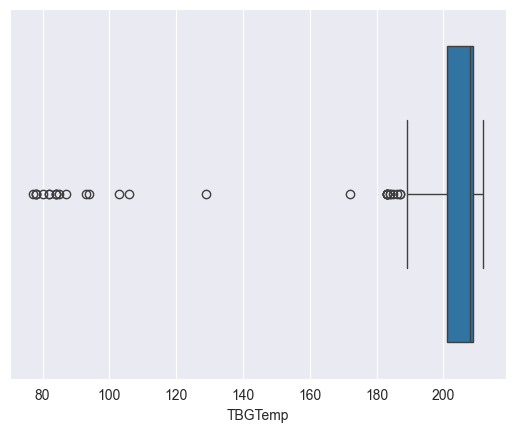

In [28]:
data_not_unrated=data[data['TBGTemp']!=0]
sns.histplot(data=data_not_unrated,x='TBGTemp',bins=4, stat='count', kde=True)
plt.show()
sns.boxplot(data = data_not_unrated, x='TBGTemp')
plt.show()

**Observação na TBGPress**

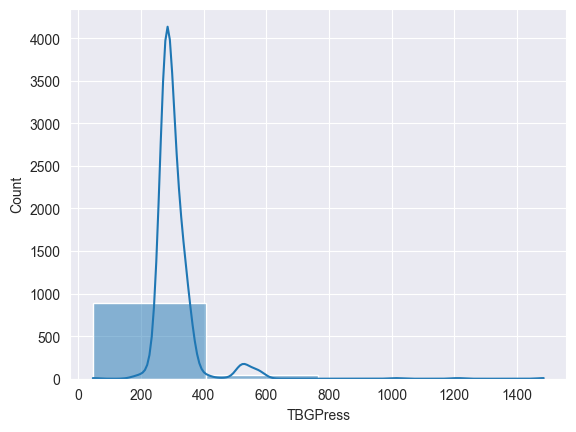

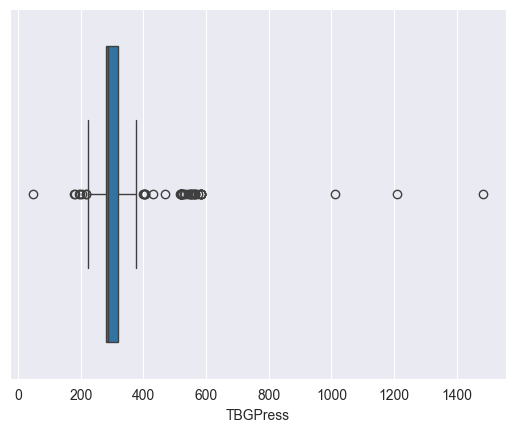

In [29]:
data_not_unrated=data[data['TBGPress']!=0]
sns.histplot(data=data_not_unrated,x='TBGPress',bins=4, stat='count', kde=True)
plt.show()
sns.boxplot(data = data_not_unrated, x='TBGPress')
plt.show()

**Observação na DiffPress**

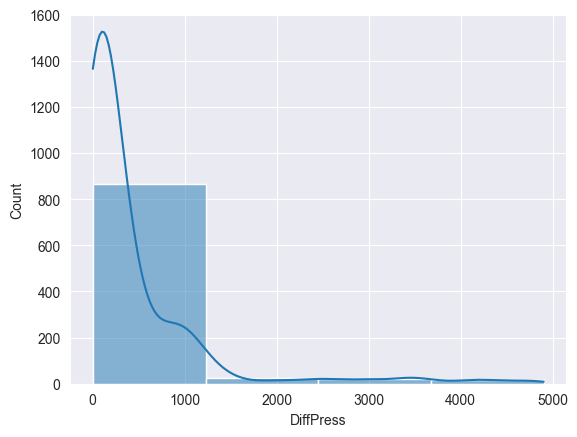

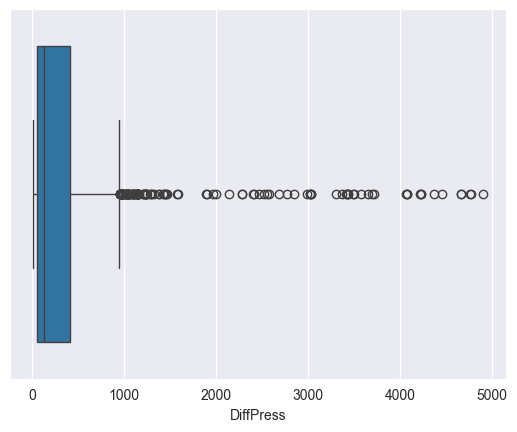

In [30]:
data_not_unrated=data[data['DiffPress']!=0]
sns.histplot(data=data_not_unrated,x='DiffPress',bins=4, stat='count', kde=True)
plt.show()
sns.boxplot(data = data_not_unrated, x='DiffPress')
plt.show()

**Observação na Pressure**

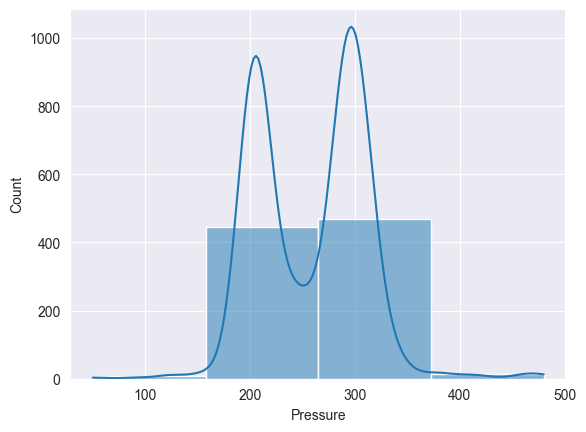

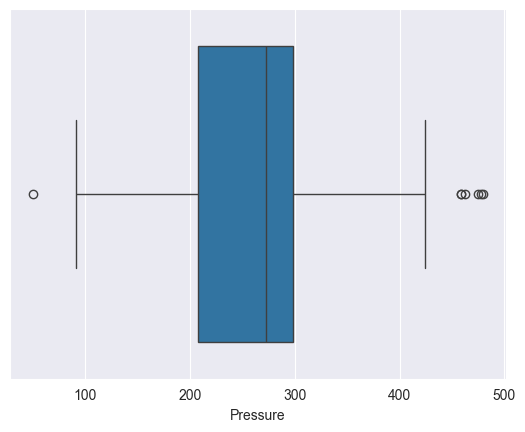

In [31]:
data_not_unrated=data[data['Pressure']!=0]
sns.histplot(data=data_not_unrated,x='Pressure',bins=4, stat='count', kde=True)
plt.show()
sns.boxplot(data = data_not_unrated, x='Pressure')
plt.show()

**Observação na Temperature**

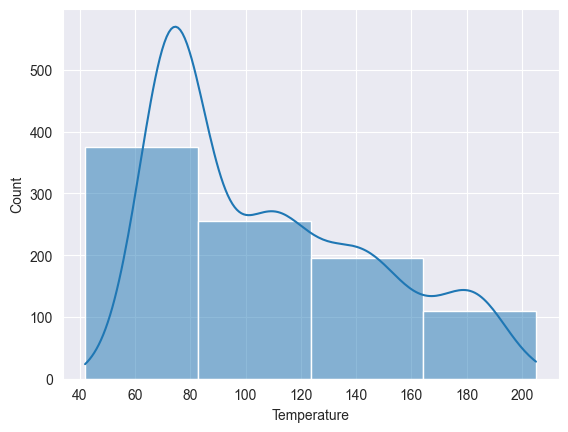

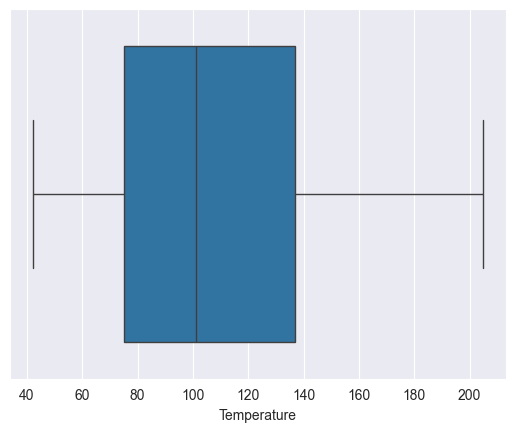

In [32]:
data_not_unrated=data[data['Temperature']!=0]
sns.histplot(data=data_not_unrated,x='Temperature',bins=4, stat='count', kde=True)
plt.show()
sns.boxplot(data = data_not_unrated, x='Temperature')
plt.show()

## Análise de Dados Bivariada

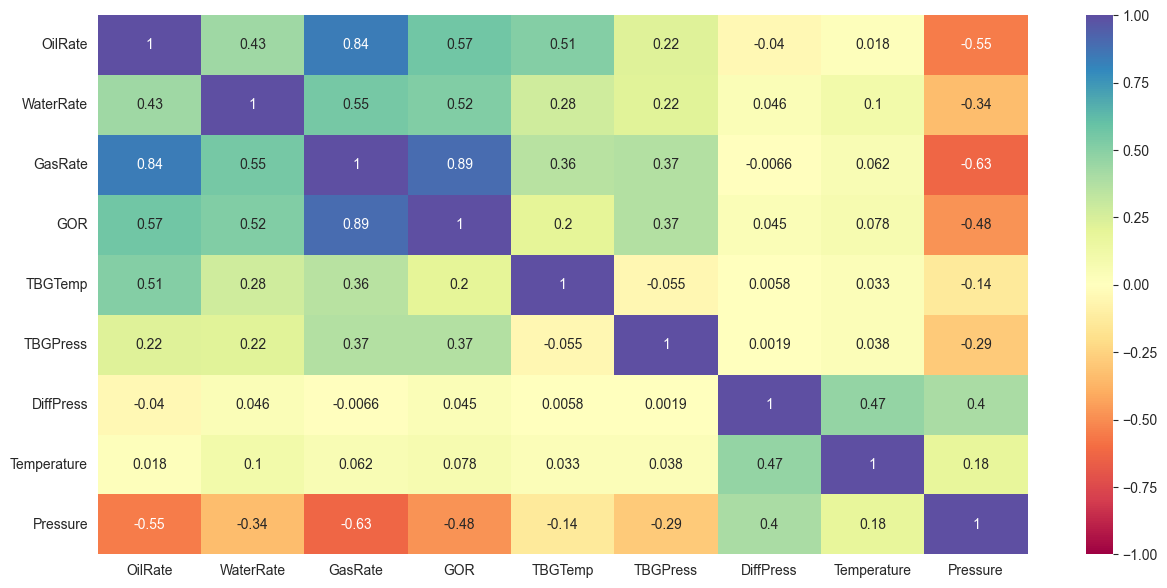

In [33]:
plt.figure(figsize=(15,7))
sns.heatmap(data.select_dtypes(include="number").corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

* Observa-se alta correlação nos dados entre as variaveis: GasRate e OilRate, GasRate e GOR

### Crie uma coluna nova

In [34]:
# Crie uma nova variavel designada Gas Liquid Ratio Rate
# No mundo do petróleo e gás, o Gas Liquid Ratio (GLR), ou razão gás-líquido, 
# é a relação entre o volume de gás produzido e o volume total de líquidos produzidos (óleo e água). 
# Em outras palavras, é uma medida de quanto gás é produzido em comparação com os líquidos durante a extração.
# Neste dataset nos nao temos os volumes por isso vamos usar os rates de agua, oleo e gas.

TotalFluid = data['OilRate'] + data['WaterRate'] 
data['GLR_Rate'] = (data['GasRate'] / TotalFluid)

In [35]:
data.head()

,OilRate,WaterRate,GasRate,GOR,TBGTemp,TBGPress,DiffPress,Temperature,Pressure,GLR_Rate
0,4124,520,6538,1585,212,583,659,126,216,1.407838
1,4125,517,6544,1587,212,584,663,129,216,1.409737
2,3848,421,6276,1631,212,582,858,180,224,1.470134
3,3856,409,3860,1001,212,582,59,105,208,0.905041
4,3915,406,4678,1195,212,583,78,75,210,1.082620


In [36]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
OilRate,935.0,3400.547594,837.087247,1.000000,2643.500000,3552.000000,4130.50000,4522.000000
WaterRate,935.0,311.301604,198.390745,0.000000,155.500000,381.000000,457.00000,1351.000000
GasRate,935.0,3853.829947,1894.257567,-54.000000,2385.500000,3286.000000,5716.50000,7404.000000
GOR,935.0,1079.660963,384.421604,-34.000000,840.500000,1036.000000,1400.50000,2498.000000
TBGTemp,935.0,203.364706,16.709081,77.000000,201.000000,208.000000,209.00000,212.000000
TBGPress,935.0,308.914439,78.931496,46.000000,279.000000,288.000000,319.00000,1485.000000
DiffPress,935.0,423.197861,760.475776,0.000000,40.500000,124.000000,404.00000,4904.000000
Temperature,935.0,108.144385,38.660792,42.000000,75.000000,101.000000,137.00000,205.000000
Pressure,935.0,258.279144,52.044148,50.000000,208.000000,273.000000,298.00000,480.000000
GLR_Rate,935.0,0.986934,0.340345,-0.032277,0.786827,0.971826,1.26977,1.900116


In [37]:
# Para esta analise nos vamos querer prever o GasLiquidRatio_Rate ele sera o nosso target mas queremos preve-lo categoricamente.
# Crie uma nova variavel 'Good_GLRR' (Bom Gas Liquid Ratio Rate) utilizando o 25th percentile. Nos vamos considerar que o Gas Liquid Ratio Rate esta num nivel bom 
# quando o seu valor esta abaixo dos 25% dos dados. 
# Use o GLR_Rate do 25th percentile como limite para definir o Good_GLRR

GLRR_25 = data['GLR_Rate'].quantile(0.25)
data['Good_GLRR'] = np.where(data['GLR_Rate'] < GLRR_25, 1, 0)

data.head()

,OilRate,WaterRate,GasRate,GOR,TBGTemp,TBGPress,DiffPress,Temperature,Pressure,GLR_Rate,Good_GLRR
0,4124,520,6538,1585,212,583,659,126,216,1.407838,0
1,4125,517,6544,1587,212,584,663,129,216,1.409737,0
2,3848,421,6276,1631,212,582,858,180,224,1.470134,0
3,3856,409,3860,1001,212,582,59,105,208,0.905041,0
4,3915,406,4678,1195,212,583,78,75,210,1.082620,0


In [38]:
data[data['Good_GLRR'] > 0]

,OilRate,WaterRate,GasRate,GOR,TBGTemp,TBGPress,DiffPress,Temperature,Pressure,GLR_Rate,Good_GLRR
5,997,1351,1467,1472,211,582,671,123,212,0.624787,1
6,3853,562,3229,838,77,198,8,77,260,0.731370,1
320,2620,190,1835,700,208,288,1,80,192,0.653025,1
338,1171,0,791,675,199,279,16,80,196,0.675491,1
339,4152,0,2687,647,206,269,3,78,50,0.647158,1
...,...,...,...,...,...,...,...,...,...,...,...
850,2390,156,1999,836,197,288,187,106,308,0.785153,1
859,2403,0,1887,785,196,278,559,166,319,0.785268,1
861,2386,0,1876,786,197,275,366,92,296,0.786253,1
864,2471,0,1875,759,195,287,932,139,308,0.758802,1


<Axes: >

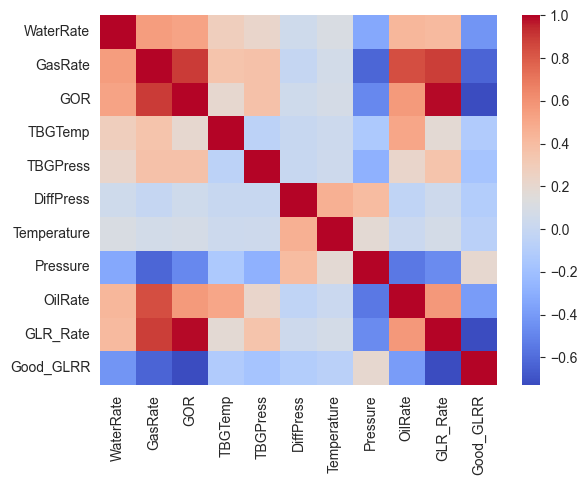

In [39]:
# Utilize a matriz de correlacao para ver que colunas devem ser removidas do dataset and de corrermos o modelo
correlation_matrix = data[[ 'WaterRate', 'GasRate', 'GOR', 'TBGTemp', 'TBGPress',
       'DiffPress', 'Temperature', 'Pressure', 'OilRate', 'GLR_Rate', 'Good_GLRR']].corr()
sns.heatmap(correlation_matrix, cmap = 'coolwarm')

### Vamos olhar para a distribuição da variável alvo

In [40]:
data["Good_GLRR"].value_counts()

Good_GLRR
0    701
1    234
Name: count, dtype: int64

In [41]:
data["Good_GLRR"].value_counts(1)

Good_GLRR
0    0.749733
1    0.250267
Name: proportion, dtype: float64

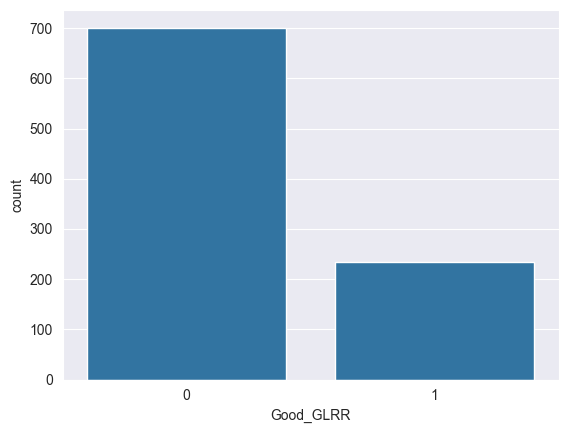

In [42]:
# Distribuição de rótulos de classe
sns.countplot(x='Good_GLRR',data=data)
plt.show()

* O número de observações em que o Gas Liquid Ratio Rate esta num nivel bom é de 701, o que representa 75% do total de dados disponíveis.

* O número de observações em que o Gas Liquid Ratio Rate não esta num nível bom é de 234, o que representa 25% do total de dados disponíveis.

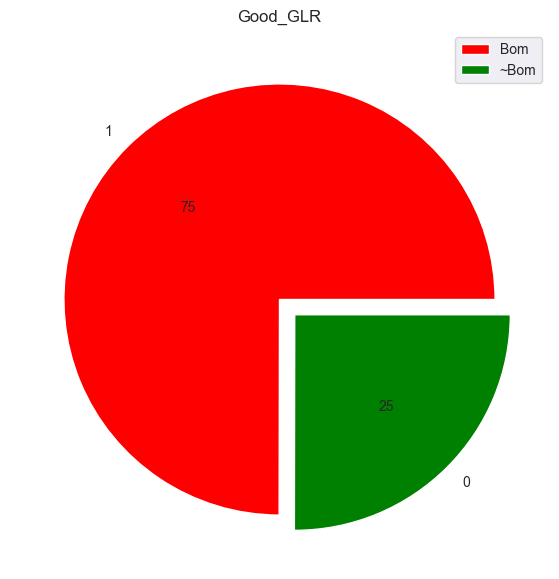

In [43]:
labels=['1','0']
count= data['Good_GLRR'].value_counts()
plt.figure(figsize=(15,7))
plt.pie(count,labels=labels,autopct='%.0f',explode=(0,.1), colors=['r','g'])
plt.legend( ['Bom','~Bom'],loc =1)

plt.title('Good_GLR')
plt.show()

**Fazendo a normalização dos dados**

In [44]:
from sklearn.preprocessing import MinMaxScaler
# Selecionar colunas numéricas
numeric_cols = data.select_dtypes(include=['number'])
# Criar o escalador
scaler = MinMaxScaler()

# Aplicar a normalização
numeric_cols_normalized = pd.DataFrame(scaler.fit_transform(numeric_cols), columns=numeric_cols.columns)

# Substituir as colunas numéricas no DataFrame original
data[numeric_cols.columns] = numeric_cols_normalized
print(data)

      OilRate  WaterRate   GasRate       GOR   TBGTemp  TBGPress  DiffPress  \
0    0.911966   0.384900  0.883883  0.639415  1.000000  0.373176   0.134380   
1    0.912188   0.382679  0.884688  0.640205  1.000000  0.373871   0.135196   
2    0.850918   0.311621  0.848753  0.657583  1.000000  0.372481   0.174959   
3    0.852687   0.302739  0.524806  0.408768  1.000000  0.372481   0.012031   
4    0.865738   0.300518  0.634486  0.485387  1.000000  0.373176   0.015905   
..        ...        ...       ...       ...       ...       ...        ...   
930  0.480867   0.153220  0.388040  0.529226  0.874074  0.154274   0.000408   
931  0.387967   0.068098  0.158219  0.266588  0.385185  0.130646   0.000408   
932  0.541031   0.158401  0.464870  0.564376  0.918519  0.134816   0.000408   
933  0.533510   0.631384  0.410566  0.505924  0.874074  0.148019   0.000408   
934  0.535501   0.165063  0.413784  0.507899  0.874074  0.156359   0.004078   

     Temperature  Pressure  GLR_Rate  Good_GLRR  
0

* Todos os dados numericos estão normalizados com um valor maximo de 1 e minimo de 0

**Observações do Good_GLR com relação as outras variaveis**

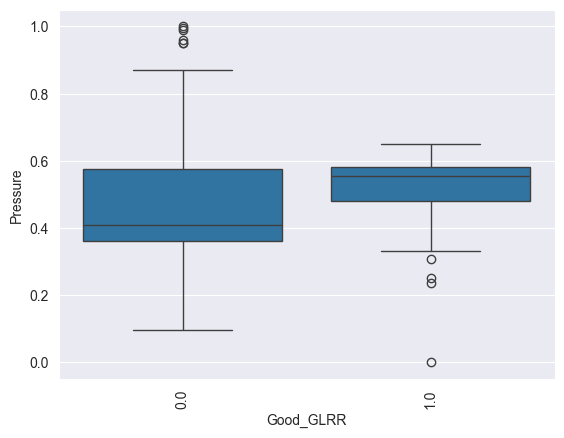

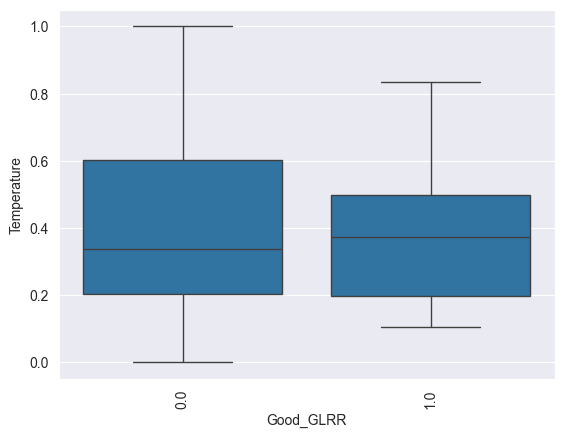

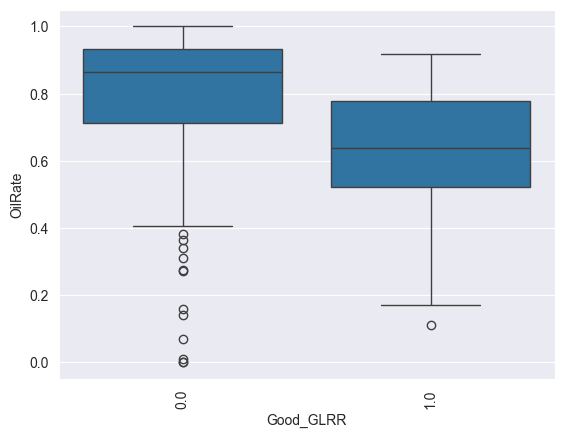

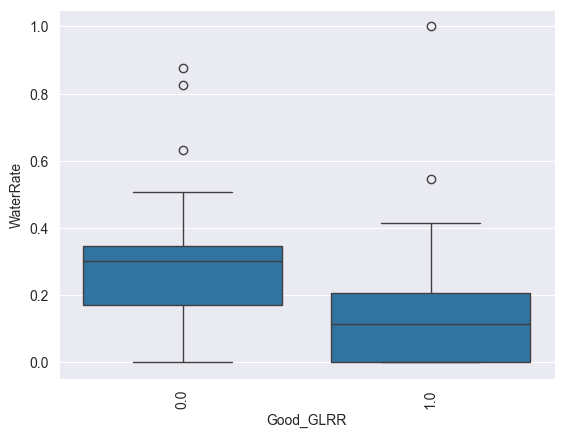

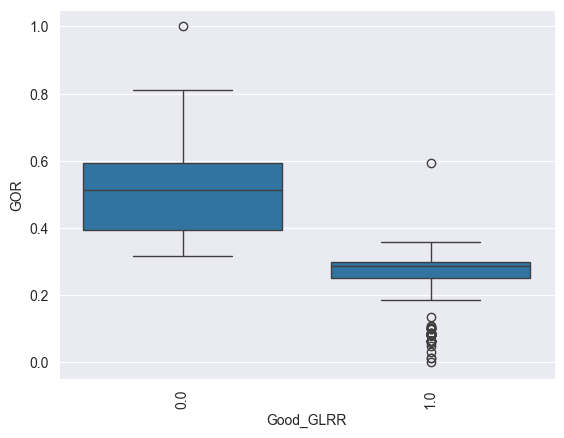

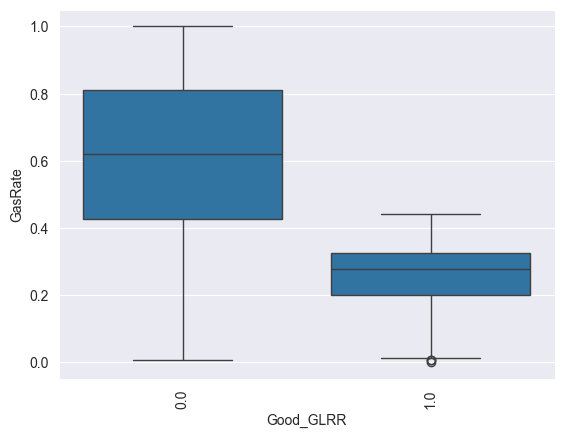

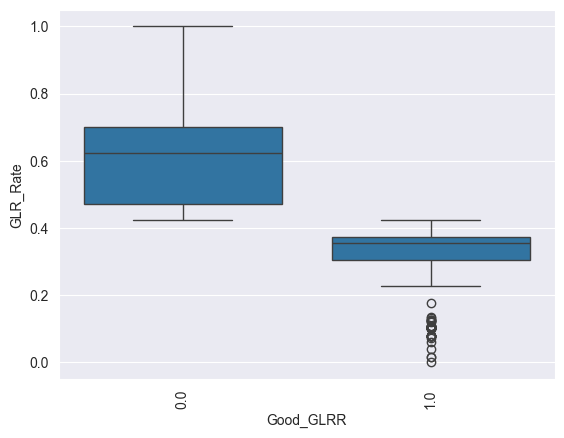

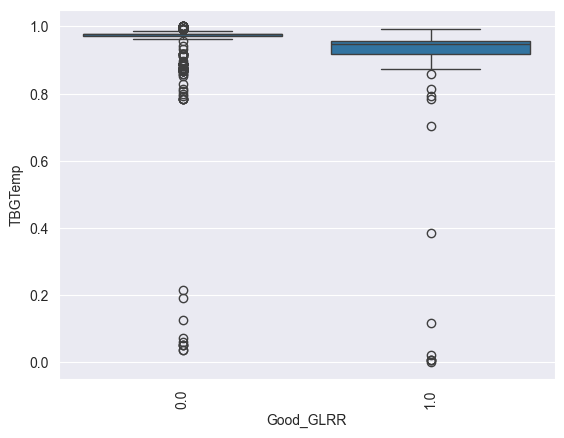

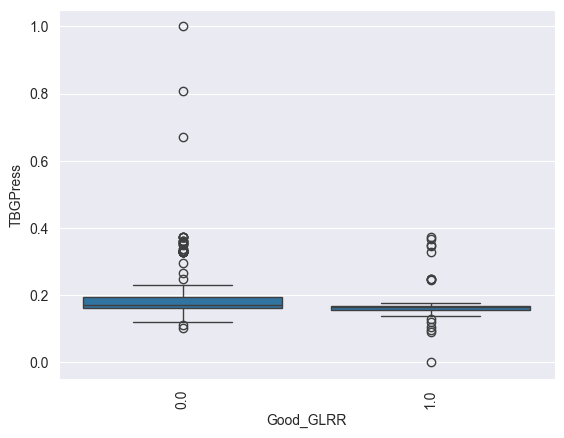

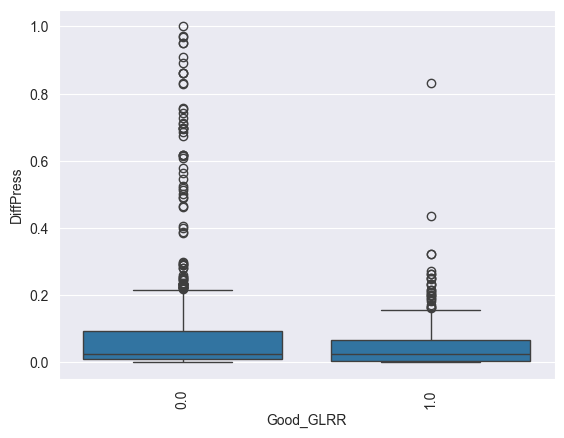

In [45]:
sns.boxplot(data=data,y='Pressure',x='Good_GLRR')
plt.xticks(rotation=90)
plt.show()
sns.boxplot(data=data,y='Temperature',x='Good_GLRR')
plt.xticks(rotation=90)
plt.show()
sns.boxplot(data=data,y='OilRate',x='Good_GLRR')
plt.xticks(rotation=90)
plt.show()
sns.boxplot(data=data,y='WaterRate',x='Good_GLRR')
plt.xticks(rotation=90)
plt.show()
sns.boxplot(data=data,y='GOR',x='Good_GLRR')
plt.xticks(rotation=90)
plt.show()
sns.boxplot(data=data,y='GasRate',x='Good_GLRR')
plt.xticks(rotation=90)
plt.show()
sns.boxplot(data=data,y='GLR_Rate',x='Good_GLRR')
plt.xticks(rotation=90)
plt.show()
sns.boxplot(data=data,y='TBGTemp',x='Good_GLRR')
plt.xticks(rotation=90)
plt.show()
sns.boxplot(data=data,y='TBGPress',x='Good_GLRR')
plt.xticks(rotation=90)
plt.show()
sns.boxplot(data=data,y='DiffPress',x='Good_GLRR')
plt.xticks(rotation=90)
plt.show()

### Correr o modelo

In [46]:
# Check os nomes das colunas
data.columns

Index(['OilRate', 'WaterRate', 'GasRate', 'GOR', 'TBGTemp', 'TBGPress',
       'DiffPress', 'Temperature', 'Pressure', 'GLR_Rate', 'Good_GLRR'],
      dtype='object')

### Modelo 1: com altas correlações entre variaveis

In [47]:
#Divida seus dados em treino e teste usando a função train_test_split do Sklearn

# Não devemos incluir a Data, pois vamos tratar as ocorrências como independentes umas das outras (sem a componente temporal)

X = data[[ 'OilRate', 'WaterRate', 'GasRate', 'GOR', 'TBGTemp', 'TBGPress',
       'DiffPress', 'Temperature', 'Pressure', 'GLR_Rate']]

# Label ou target variable
y = data[['Good_GLRR']]

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [48]:
### Corra o Decision Tree Classifier model ###

# Define o modelo
model = DecisionTreeClassifier(random_state=0)

# Fit the model (faca o modelo trainas com os dados de treinamento)
lg=model.fit(X_train, y_train.values.ravel())

# Score the model performance (check how many correct predictions it made using data that it has not seen before)
model.score(X_test, y_test.values.ravel())

1.0

In [49]:
pred_train = lg.predict(X_train) > 0.5
pred_train = np.round(pred_train)
pred_test = lg.predict(X_test) > 0.5
pred_test = np.round(pred_test)

**ROC-AUC em conjunto de treinamento**

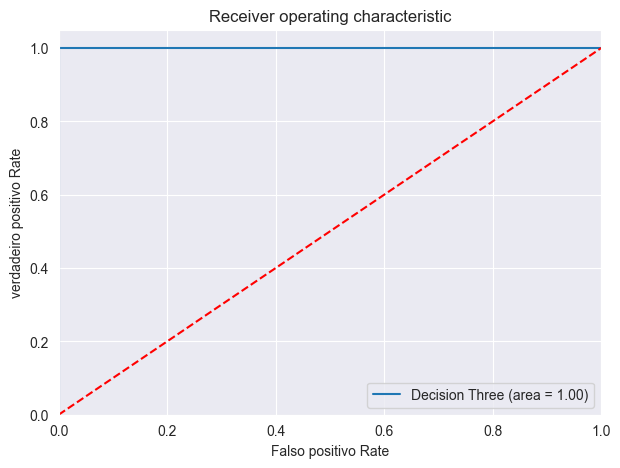

In [50]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, lg.predict(X_train))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Decision Three (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Falso positivo Rate")
plt.ylabel("verdadeiro positivo Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Matriz de confusão**

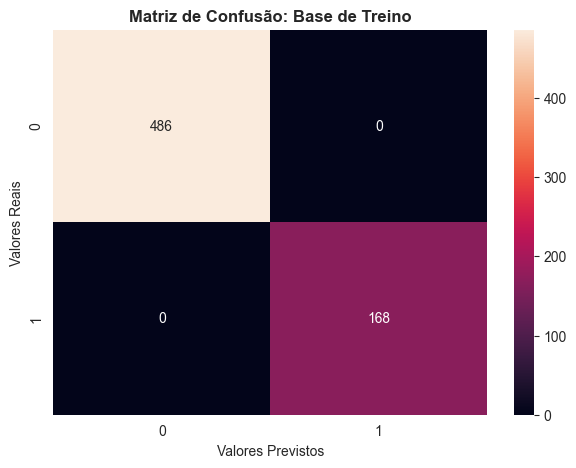

In [51]:
cm = confusion_matrix(y_train, pred_train)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.title('Matriz de Confusão: Base de Treino', weight='bold')
plt.xlabel("Valores Previstos")
plt.ylabel("Valores Reais")
plt.show()

**Verificando a precisão do treino e teste**

In [52]:
#print("Accuracy on training set : ", accuracy_score(y_train, pred_train))
accuracy=accuracy_score(y_train, pred_train)
print("Acurácia no conjunto de treinamento:",(accuracy*100),'%')

#print("Accuracy on test set : ", accuracy_score(y_test, pred_test))
accuracy1=accuracy_score(y_test, pred_test)
print("Acurácia no conjunto de teste:",(accuracy1*100),'%')

Acurácia no conjunto de treinamento: 100.0 %
Acurácia no conjunto de teste: 100.0 %


In [53]:
from sklearn.metrics import classification_report
y_pred = lg.predict(X_test)
target_names = ['~Bom', 'Bom']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        ~Bom       1.00      1.00      1.00       215
         Bom       1.00      1.00      1.00        66

    accuracy                           1.00       281
   macro avg       1.00      1.00      1.00       281
weighted avg       1.00      1.00      1.00       281



In [54]:
# Obter a importância das variáveis

importances = model.feature_importances_

# Criar um DataFrame para visualização
importance_df = pd.DataFrame({
    'Feature':  X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

       Feature  Importance
9     GLR_Rate         1.0
0      OilRate         0.0
1    WaterRate         0.0
2      GasRate         0.0
3          GOR         0.0
4      TBGTemp         0.0
5     TBGPress         0.0
6    DiffPress         0.0
7  Temperature         0.0
8     Pressure         0.0


**Verificando a multicolinearidade**

In [55]:
# vamos verificar o VIF dos preditores
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

OilRate         133.099119
WaterRate        36.492673
GasRate         141.559692
GOR            5011.600214
TBGTemp          70.171886
TBGPress         13.836311
DiffPress         2.004043
Temperature       5.134487
Pressure         34.825987
GLR_Rate       4597.739030
dtype: float64



* Observamos que há multicolinearidade forte presente nos dados.
* Tendo em conta que, um VIF menor que 5 indica uma baixa correlação desse preditor com outros preditores. Um valor entre 5 e 10 indica uma correlação moderada, enquanto valores de VIF maiores que 10 são um sinal de correlação alta e não tolerável dos preditores do modelo
* Sendo os mesmos observaveis em *OilRate* - *GOR* - *WaterRate* -*GLR_rate* -*TBGPress* -*TBGTemp* -*GasRate*.
* Consideraremos posterior alteração nas variaveis -*GLR_rate*- *GOR*


RESPOSTA:
* Qual foi o score ou a precisao deste modelo?Podemos confiar no resultado? R: A precisão deste modelo foi de 100%, não é confiavel pois as altas correlações de variaveis são sinais de que o nosso modelo pode estar sobreajustado(overfitting) e ter vazamento de dados. Isso não garante que o desempenho do mesmo com novos dados será da mesma forma.
  

### Modelo 2: com baixa correlação entre variaveis

In [56]:
data[[ 'OilRate', 'WaterRate', 'GasRate', 'TBGTemp', 'TBGPress',
       'DiffPress', 'Temperature', 'Pressure','Good_GLRR']].corr()
#Eliminou-se as variaveis GOR e GLR_Rate

,OilRate,WaterRate,GasRate,TBGTemp,TBGPress,DiffPress,Temperature,Pressure,Good_GLRR
OilRate,1.000000,0.429810,0.841243,0.512368,0.220895,-0.039815,0.018185,-0.551962,-0.396222
WaterRate,0.429810,1.000000,0.554143,0.277286,0.216661,0.045514,0.102691,-0.336097,-0.428934
GasRate,0.841243,0.554143,1.000000,0.357406,0.368179,-0.006558,0.062068,-0.626492,-0.634610
TBGTemp,0.512368,0.277286,0.357406,1.000000,-0.054611,0.005772,0.032727,-0.137315,-0.120842
TBGPress,0.220895,0.216661,0.368179,-0.054611,1.000000,0.001950,0.037996,-0.286412,-0.172482
DiffPress,-0.039815,0.045514,-0.006558,0.005772,0.001950,1.000000,0.465925,0.399509,-0.103793
Temperature,0.018185,0.102691,0.062068,0.032727,0.037996,0.465925,1.000000,0.180263,-0.073151
Pressure,-0.551962,-0.336097,-0.626492,-0.137315,-0.286412,0.399509,0.180263,1.000000,0.200819
Good_GLRR,-0.396222,-0.428934,-0.634610,-0.120842,-0.172482,-0.103793,-0.073151,0.200819,1.000000


* Observa-se boa correlação entre as variaveis não eliminadas

In [57]:
# Com base nas obervacoes da matrix de correlacao identifique outras variaves que devem ser removidas
X = data[[ 'OilRate', 'WaterRate', 'GasRate', 'TBGTemp', 'TBGPress',
       'DiffPress', 'Temperature', 'Pressure']]

# Label or target variable. The variable your model will try to predict
y = data[['Good_GLRR']]

X = add_constant(X)
X = pd.get_dummies(X, drop_first=True, dtype = int)

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [58]:
### Corra o Decision Tree Classifier model ###

# Define o modelo
model = DecisionTreeClassifier(random_state=0)

# Fit the model (faca o modelo trainas com os dados de treinamento)
lg=model.fit(X_train, y_train.values.ravel())


# Score the model performance (check how many correct predictions it made using data that it has not seen before)
model.score(X_test, y_test.values.ravel())

0.9572953736654805

In [59]:
pred_train = lg.predict(X_train) > 0.5
pred_train = np.round(pred_train)
pred_test = lg.predict(X_test) > 0.5
pred_test = np.round(pred_test)

**Observando a matriz de confusão no conjunto de treinamento**

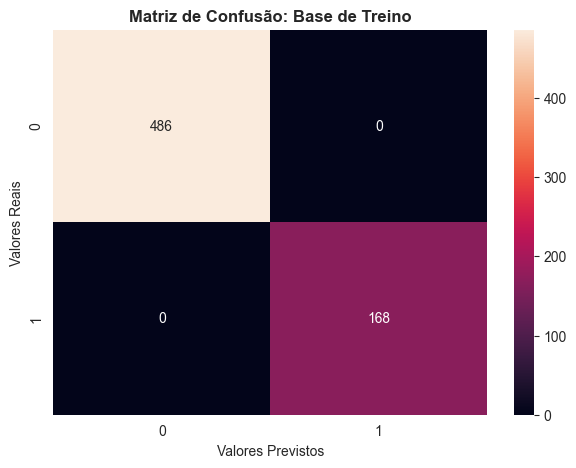

In [60]:
cm = confusion_matrix(y_train, pred_train)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.title('Matriz de Confusão: Base de Treino', weight='bold')
plt.xlabel("Valores Previstos")
plt.ylabel("Valores Reais")
plt.show()

**Verificando a precisão do treino e teste**

In [61]:
#print("Accuracy on training set : ", accuracy_score(y_train, pred_train))
accuracy=accuracy_score(y_train, pred_train)
print("Acurácia no conjunto de treinamento:",(accuracy*100),'%')

#print("Accuracy on test set : ", accuracy_score(y_test, pred_test))
accuracy1=accuracy_score(y_test, pred_test)
print("Acurácia no conjunto de teste:",(accuracy1*100),'%')

Acurácia no conjunto de treinamento: 100.0 %
Acurácia no conjunto de teste: 95.72953736654804 %


In [62]:
from sklearn.metrics import classification_report
y_pred = lg.predict(X_test)
target_names = ['~Bom', 'Bom']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        ~Bom       0.96      0.98      0.97       215
         Bom       0.94      0.88      0.91        66

    accuracy                           0.96       281
   macro avg       0.95      0.93      0.94       281
weighted avg       0.96      0.96      0.96       281



**Verificando a multicolinearidade**

In [63]:
# vamos verificar o VIF dos preditores
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const          114.884682
OilRate          4.529642
WaterRate        1.525836
GasRate          5.425336
TBGTemp          1.472912
TBGPress         1.234063
DiffPress        1.611690
Temperature      1.305099
Pressure         2.207029
dtype: float64



**ROC-AUC em conjunto de treinamento**

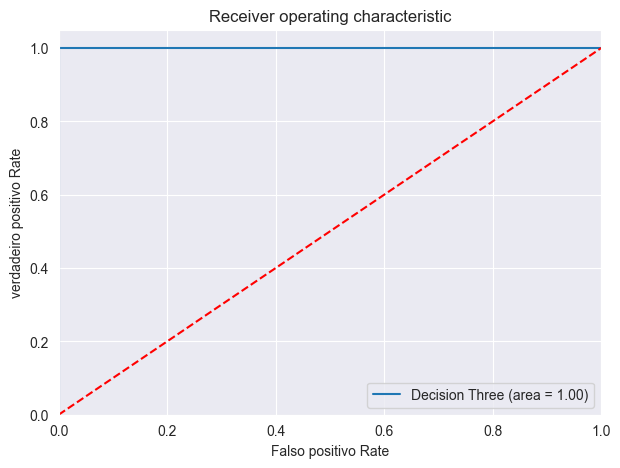

In [64]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, lg.predict(X_train))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Decision Three (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Falso positivo Rate")
plt.ylabel("verdadeiro positivo Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

RESPOSTAS:

* Q1-Alguma de suas variáveis não é um numero inteiro? Se sim, quais são e qual é o tipo de dado delas?
  R: A principio, as variaveis que não eram do tipo inteiro, foram TBGTemp e TBGPress, tinham como tipo de dados objeto.
  
* Q2-Quais problemas você encontrou no processo de limpeza de dados?
R: No processo de limpeza de dados, encontrou-se entradas invalidas em 2 variaveis.

* Q3-Qual é o percentil 25 para GasLiquidRatio?
  R: O percentil 25 para o GLR_Rate é de 0.786827

* Q4-Qual função você usa para dividir seus dados em treinamento e teste?
  R: A função usada para este fim é :train_test_split(X, y, test_size=0.30, random_state=42)

* Q5-Qual função você usou para obter a precisão e avaliar o seu modelo?
  R: Para obter a precisão e avaliar o modelo usou-se:classification_report(y_test, y_pred, target_names=target_names)

* Q6-Qual foi a precisão que você obteve para o seu primeiro modelo?
  R:A precisão deste modelo foi de 100%

* Q7-Depois de remover algumas variaveis qual foi o score (precisao) do segundo modelo?
  R: A precisão deste modelo foi de 95%.
  
* Q8-Qual dos resultados e mais confiavel?
R: O resultado do segundo modelo é mais confiavel, tendo em conta que no primeiro modelo, a precisão foi de 100%, não sendo considerado como confiavel pois as altas correlações de variaveis são sinais de que o nosso modelo pode estar sobreajustado(overfitting) e ter vazamento de dados. Isso não garante que o desempenho do mesmo com novos dados será da mesma forma.Logo, assumindo que com a redução significativa das altas correlações podemos prever novos dados de forma mais acertadas pois eliminou-se grande parte do problema do overfitting.

* Q9-Podem existir mais variaveis a causar problemas? Que variaveis recomendarias removermos ou mantermos para esta analise?
 R: Tendo em conta que o fator de variancia para as variaveis restantes é boa, então não se observa-se de forma notória outra variavel, logo pode-se manter as variavies.


# Observando os modelos de classificação - não ajustados

* Instigação e consideração: Tendo em conta que a variavel alvo é do tipo binomial, tendo como objetivo final a classificação, logo considerou-se alguns dos modelos abordados em sala de sessão, em destaque: arvore de decisão, floresta aleatoria, regressão logistica Naive Bayes, SVM, gradientBoosting e KNN. Lembrando que, todos os modelos citados estão apresentados no material de apoio do modulo 3, "imagem  geral  de  aprendizado  de  máquina
, na pagina 6 do material mencionado acima.  

In [65]:
# Importando as bibliotecas necessarias 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [66]:
# Selecionar características e variável alvo
X = data[['OilRate', 'WaterRate', 'GasRate', 'TBGTemp', 'TBGPress',
          'DiffPress', 'Temperature', 'Pressure']]
y = data[['Good_GLRR']]

# Adicionar constante
X = add_constant(X)

# Codificar variáveis categóricas
X = pd.get_dummies(X, drop_first=True, dtype=int)

# Dividir dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


**Verificando a multicolinearidade entre as variaveis**

In [67]:
# vamos verificar o VIF dos preditores
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const          114.884682
OilRate          4.529642
WaterRate        1.525836
GasRate          5.425336
TBGTemp          1.472912
TBGPress         1.234063
DiffPress        1.611690
Temperature      1.305099
Pressure         2.207029
dtype: float64



* Tendo em conta que, o VIF é uma das formas mais comuns de detectar multicolinearidade ("manual de apoio 2: MLG",pag 13), observa-se positivamente o mesmo, logo ,intuitivamente considera-se que a relação entre as variaveis mantidas não terão influencia negativa-significativa para o modelo.

**Modelo principal : Arvore de decisão(DTs)**

In [68]:
# Inicializar e treinar o modelo
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train.values.ravel())

# Fazer previsões
y_pred_tree = tree_clf.predict(X_test)

# Avaliar o modelo
print("Árvore de Decisão:")
print("Acurácia:", accuracy_score(y_test, y_pred_tree))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_tree))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_tree))


Árvore de Decisão:
Acurácia: 0.9608540925266904
Matriz de Confusão:
 [[211   4]
 [  7  59]]
Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       215
         1.0       0.94      0.89      0.91        66

    accuracy                           0.96       281
   macro avg       0.95      0.94      0.94       281
weighted avg       0.96      0.96      0.96       281



**Modelo alternativo: 1- Regressão logistica**

In [69]:
# Inicializar e treinar o modelo
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train.values.ravel())

# Fazer previsões
y_pred_log = log_reg.predict(X_test)

# Avaliar o modelo
print("Regressão Logística:")
print("Acurácia:", accuracy_score(y_test, y_pred_log))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_log))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_log))


Regressão Logística:
Acurácia: 0.8861209964412812
Matriz de Confusão:
 [[205  10]
 [ 22  44]]
Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.90      0.95      0.93       215
         1.0       0.81      0.67      0.73        66

    accuracy                           0.89       281
   macro avg       0.86      0.81      0.83       281
weighted avg       0.88      0.89      0.88       281



**Modelo alternativo: 2- Support Vector Machines (SVM)**

In [70]:
# Inicializar e treinar o modelo
svm_clf = SVC()
svm_clf.fit(X_train, y_train.values.ravel())

# Fazer previsões
y_pred_svm = svm_clf.predict(X_test)

# Avaliar o modelo
print("Support Vector Machines (SVM):")
print("Acurácia:", accuracy_score(y_test, y_pred_svm))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_svm))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_svm))


Support Vector Machines (SVM):
Acurácia: 0.9679715302491103
Matriz de Confusão:
 [[211   4]
 [  5  61]]
Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       215
         1.0       0.94      0.92      0.93        66

    accuracy                           0.97       281
   macro avg       0.96      0.95      0.96       281
weighted avg       0.97      0.97      0.97       281



**Modelo alternativo: 3- K-Nearest Neighbors (KNN)**

In [71]:
# Inicializar e treinar o modelo
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train.values.ravel())

# Fazer previsões
y_pred_knn = knn_clf.predict(X_test)

# Avaliar o modelo
print("K-Nearest Neighbors (KNN):")
print("Acurácia:", accuracy_score(y_test, y_pred_knn))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_knn))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_knn))


K-Nearest Neighbors (KNN):
Acurácia: 0.9323843416370107
Matriz de Confusão:
 [[207   8]
 [ 11  55]]
Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.95      0.96      0.96       215
         1.0       0.87      0.83      0.85        66

    accuracy                           0.93       281
   macro avg       0.91      0.90      0.90       281
weighted avg       0.93      0.93      0.93       281



**Modelo alternativo: 4- Gradient Boosting**

In [72]:
# Inicializar e treinar o modelo
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train.values.ravel())

# Fazer previsões
y_pred_gb = gb_clf.predict(X_test)

# Avaliar o modelo
print("Gradient Boosting:")
print("Acurácia:", accuracy_score(y_test, y_pred_gb))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_gb))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_gb))


Gradient Boosting:
Acurácia: 0.9679715302491103
Matriz de Confusão:
 [[212   3]
 [  6  60]]
Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       215
         1.0       0.95      0.91      0.93        66

    accuracy                           0.97       281
   macro avg       0.96      0.95      0.95       281
weighted avg       0.97      0.97      0.97       281



**Modelo alternativo: 5- Naive Bayes**

In [73]:
# Inicializar e treinar o modelo
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train.values.ravel())

# Fazer previsões
y_pred_nb = nb_clf.predict(X_test)

# Avaliar o modelo
print("Naive Bayes:")
print("Acurácia:", accuracy_score(y_test, y_pred_nb))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_nb))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_nb))


Naive Bayes:
Acurácia: 0.8505338078291815
Matriz de Confusão:
 [[179  36]
 [  6  60]]
Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.97      0.83      0.90       215
         1.0       0.62      0.91      0.74        66

    accuracy                           0.85       281
   macro avg       0.80      0.87      0.82       281
weighted avg       0.89      0.85      0.86       281



**Modelo alternativo: 6- Random Forest**

In [74]:
# Inicializar e treinar o modelo
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train.values.ravel())

# Fazer previsões
y_pred_rf = rf_clf.predict(X_test)

# Avaliar o modelo
print("Random Forest:")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_rf))


Random Forest:
Acurácia: 0.9572953736654805
Matriz de Confusão:
 [[211   4]
 [  8  58]]
Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       215
         1.0       0.94      0.88      0.91        66

    accuracy                           0.96       281
   macro avg       0.95      0.93      0.94       281
weighted avg       0.96      0.96      0.96       281



**Observações:**

* Acima utilizou-se alguns modelos de classificação de aprendizagens supervisionada e emseble, explicitamente os modelos:
  
* Regressão Logística
    * para resolver problemas de classificação binária onde a variável alvo é "Good_GLRR" (por exemplo, 1 para "Bom" e 0 para "Não Bom").
    * Transforma a combinação linear das variáveis independentes em uma probabilidade usando a função sigmoide.Decisão final baseada em um limiar (geralmente 0,5) para classificar a amostra.
      

* Árvore de Decisão
    * para problemas de classificação binária com a variável alvo "Good_GLRR", onde queremos construir uma árvore de decisão para prever se "Good_GLRR" é 1 ("Bom") ou 0 ("Não Bom").
    * Constrói uma árvore onde cada nó representa uma decisão baseada nas variáveis independentes.Cada folha da árvore representa uma previsão da classe "Bom" ou "Não Bom".
      

* Random Forest
    * para melhorar a precisão na previsão da variável binária "Good_GLRR" ao usar um ensemble de árvores de decisão.
    * Cria múltiplas árvores de decisão treinadas em subconjuntos aleatórios dos dados e variáveis independentes.A previsão final é obtida pela votação majoritária entre as árvores (para classificação).
      

* Support Vector Machines (SVM)
    * para classificação binária onde queremos prever a variável "Good_GLRR" encontrando o melhor hiperplano que separa as classes "Bom" e "Não Bom".
    * Encontra o hiperplano que maximiza a margem entre as classes.Para problemas não lineares, pode usar funções kernel para transformar os dados e encontrar um hiperplano no espaço transformado.
      
 
* K-Nearest Neighbors (KNN)
    * para classificação binária, onde a previsão da variável "Good_GLRR" é feita com base nas classes dos k vizinhos mais próximos.
    * Calcula a distância entre a amostra a ser classificada e todas as amostras de treinamento.A previsão é feita com base na maioria das classes entre os k vizinhos mais próximos.
      
   
* Gradient Boosting
    * para melhorar a previsão da variável binária "Good_GLRR" ajustando-se iterativamente aos erros dos modelos anteriores.
    * Constrói um ensemble de modelos de decisão sequenciais, onde cada modelo corrige os erros dos anteriores.A previsão final é uma combinação ponderada das previsões de todos os modelos no ensemble.
 
Nota: Dentro todos modelos observados acima, o que se saiu melhor foi o Gradient Boosting com 96% de acuracia, seguido pelo Random Forest com 95% de acuracia


# Observando os modelos de classificação - ajustados

In [75]:
# importando o gridsearch para otimizar os hiperparâmetros de um modelo.
from sklearn.model_selection import GridSearchCV

# Selecionar características e variável alvo
X = data[['OilRate', 'WaterRate', 'GasRate', 'TBGTemp', 'TBGPress',
          'DiffPress', 'Temperature', 'Pressure']]
y = data[['Good_GLRR']]

# Adicionar constante (se necessário para o modelo)
X = add_constant(X)

# Codificar variáveis categóricas
X = pd.get_dummies(X, drop_first=True, dtype=int)

# Dividir dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

**Modelo principal : Arvore de decisão(DTs) -ajustado**

In [76]:

# Definindo o modelo
dt = DecisionTreeClassifier()

# Definindo o grid de hiperparâmetros
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Inicializar o Grid Search
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')

# Treinar o modelo
grid_search.fit(X_train, y_train.values.ravel())

# Obter os melhores parâmetros e o melhor modelo
best_params_dt= grid_search.best_params_
best_dt = grid_search.best_estimator_

# Fazer previsões
y_pred_dt = best_dt.predict(X_test)

# Avaliar o modelo
print("Arvore de decisão:")
print("Melhores Parâmetros:", best_params_dt)
print("Acurácia:", accuracy_score(y_test, y_pred_log))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_dt))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_dt))


Arvore de decisão:
Melhores Parâmetros: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Acurácia: 0.8861209964412812
Matriz de Confusão:
 [[210   5]
 [  9  57]]
Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       215
         1.0       0.92      0.86      0.89        66

    accuracy                           0.95       281
   macro avg       0.94      0.92      0.93       281
weighted avg       0.95      0.95      0.95       281



    Hiperparâmetros para Decision Tree:
    
    max_depth: Profundidade máxima da árvore.
    Valores: [None, 10, 20, 30, 40, 50]
    Efeito: O parâmetro max_depth controla a profundidade máxima da árvore de decisão. Um valor maior permite que a árvore cresça mais e capture padrões mais complexos, mas também pode levar a overfitting se a árvore se tornar muito complexa. Um valor menor simplifica a árvore e pode ajudar a evitar overfitting, mas pode resultar em underfitting se a árvore for muito rasa.
    
    min_samples_split: Número mínimo de amostras necessárias para dividir um nó interno.
    Valores: [2, 5, 10]
    Efeito: O parâmetro min_samples_split controla o número mínimo de amostras necessárias para fazer uma divisão em um nó. Valores menores permitem que a árvore faça divisões mais específicas, o que pode levar a overfitting. Valores maiores tornam a árvore mais generalizada e podem reduzir o overfitting.
    
    min_samples_leaf: Número mínimo de amostras necessárias para estar em um nó folha.
    Valores: [1, 2, 4]
    Efeito: O parâmetro min_samples_leaf controla o número mínimo de amostras necessárias em um nó folha. Valores menores permitem que a árvore crie folhas com menos amostras, o que pode resultar em uma árvore mais complexa e suscetível a overfitting. Valores maiores ajudam a generalizar a árvore e podem reduzir o overfitting.

**Modelo alternativo: 1- Regressão logistica -ajustado**

In [77]:
# Definir o modelo
log_reg = LogisticRegression()

# Definir os parâmetros para o Grid Search
param_grid_log_reg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Inicializar o Grid Search
grid_search_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5, scoring='accuracy', n_jobs=-1)

# Treinar o modelo
grid_search_log_reg.fit(X_train, y_train.values.ravel())

# Obter os melhores parâmetros e o melhor modelo
best_params_log_reg = grid_search_log_reg.best_params_
best_log_reg = grid_search_log_reg.best_estimator_

# Fazer previsões
y_pred_log = best_log_reg.predict(X_test)

# Avaliar o modelo
print("Regressão Logística:")
print("Melhores Parâmetros:", best_params_log_reg)
print("Acurácia:", accuracy_score(y_test, y_pred_log))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_log))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_log))


Regressão Logística:
Melhores Parâmetros: {'C': 100, 'solver': 'liblinear'}
Acurácia: 0.9715302491103203
Matriz de Confusão:
 [[214   1]
 [  7  59]]
Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       215
         1.0       0.98      0.89      0.94        66

    accuracy                           0.97       281
   macro avg       0.98      0.94      0.96       281
weighted avg       0.97      0.97      0.97       281



    Hiperparâmetros para Regressão Logística:
    
    C: Parâmetro de regularização.
    Valores: [0.01, 0.1, 1, 10, 100]
    Efeito: O parâmetro C controla o trade-off entre maximizar a margem de separação e minimizar o erro de classificação. Um valor menor de C significa mais regularização (penaliza grandes coeficientes), enquanto um valor maior de C significa menos regularização (permite coeficientes maiores). Isso ajuda a evitar overfitting e underfitting.
    
    solver: Algoritmo de otimização usado para ajustar os parâmetros do modelo.
    Valores: ['liblinear', 'saga']
    Efeito:
    'liblinear': Um solver baseado em otimização de gradiente que é mais adequado para conjuntos de dados pequenos e médios. Ele suporta L1 e L2 regularização.
    'saga': Um solver baseado em gradiente estocástico que é mais eficiente em conjuntos de dados grandes e pode lidar com regularização L1 e L2.

**Modelo alternativo: 2- Support Vector Machines (SVM) -ajustado**

In [78]:
# Definir o modelo
svm_clf = SVC()

# Definir os parâmetros para o Grid Search
param_grid_svm = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']
}

# Inicializar o Grid Search
grid_search_svm = GridSearchCV(svm_clf, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)

# Treinar o modelo
grid_search_svm.fit(X_train, y_train.values.ravel())

# Obter os melhores parâmetros e o melhor modelo
best_params_svm = grid_search_svm.best_params_
best_svm = grid_search_svm.best_estimator_

# Fazer previsões
y_pred_svm = best_svm.predict(X_test)

# Avaliar o modelo
print("Support Vector Machines (SVM):")
print("Melhores Parâmetros:", best_params_svm)
print("Acurácia:", accuracy_score(y_test, y_pred_svm))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_svm))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_svm))


Support Vector Machines (SVM):
Melhores Parâmetros: {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}
Acurácia: 0.9715302491103203
Matriz de Confusão:
 [[215   0]
 [  8  58]]
Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       215
         1.0       1.00      0.88      0.94        66

    accuracy                           0.97       281
   macro avg       0.98      0.94      0.96       281
weighted avg       0.97      0.97      0.97       281



    Hiperparâmetros para SVM:
    
    C: Parâmetro de regularização.
    Valores: [0.01, 0.1, 1, 10, 100]
    Efeito: O parâmetro C controla o trade-off entre maximizar a margem e minimizar o erro de classificação. Um valor maior de C tenta classificar todos os exemplos corretamente (menor margem), enquanto um valor menor de C cria uma margem maior, permitindo alguns erros de classificação (maior margem).
    
    gamma: Parâmetro do kernel radial (RBF) e polinomial.
    Valores: [0.001, 0.01, 0.1, 1, 10]
    Efeito: O parâmetro gamma controla a influência de uma única amostra. Um valor alto faz com que a influência de cada amostra seja mais local, enquanto um valor baixo faz com que a influência seja mais global. Para o kernel rbf (Radial Basis Function) e poly (polinomial), gamma determina a forma do kernel.
    
    kernel: Tipo de kernel a ser utilizado.
    Valores: ['linear', 'rbf', 'poly']
    Efeito:
    'linear': Usado para problemas lineares.
    'rbf': Kernel Gaussiano, útil para problemas não lineares.
    'poly': Kernel polinomial, útil para problemas onde a relação entre as características e a classe é polinomial.

**Modelo alternativo: 3- K-Nearest Neighbors (KNN) -ajustado**

In [79]:
# Definir o modelo
knn_clf = KNeighborsClassifier()

# Definir os parâmetros para o Grid Search
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 para Manhattan e 2 para Euclidean
}

# Inicializar o Grid Search
grid_search_knn = GridSearchCV(knn_clf, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)

# Treinar o modelo
grid_search_knn.fit(X_train, y_train.values.ravel())

# Obter os melhores parâmetros e o melhor modelo
best_params_knn = grid_search_knn.best_params_
best_knn = grid_search_knn.best_estimator_

# Fazer previsões
y_pred_knn = best_knn.predict(X_test)

# Avaliar o modelo
print("K-Nearest Neighbors (KNN):")
print("Melhores Parâmetros:", best_params_knn)
print("Acurácia:", accuracy_score(y_test, y_pred_knn))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_knn))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_knn))


K-Nearest Neighbors (KNN):
Melhores Parâmetros: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Acurácia: 0.9537366548042705
Matriz de Confusão:
 [[210   5]
 [  8  58]]
Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       215
         1.0       0.92      0.88      0.90        66

    accuracy                           0.95       281
   macro avg       0.94      0.93      0.93       281
weighted avg       0.95      0.95      0.95       281



    Hiperparâmetros para K-Nearest Neighbors:
    
    n_neighbors: Número de vizinhos a serem considerados para classificar um ponto.
    Valores: [3, 5, 7, 10]
    Efeito: Um valor menor de n_neighbors pode tornar o modelo mais sensível ao ruído nos dados, enquanto um valor maior pode tornar o modelo mais generalizado e menos sensível a variações pequenas. O valor ideal depende do balanceamento entre bias e variância para o seu problema específico.

    weights: Método de ponderação para calcular a decisão baseada nos vizinhos.
    Valores: ['uniform', 'distance']
    Efeito:
    'uniform': Todos os vizinhos têm o mesmo peso.
    'distance': Vizinho mais próximo tem mais influência na classificação ou na regressão. A influência diminui com a distância.
    
    p: Parâmetro de distância para o cálculo da métrica.
    Valores: [1, 2]
    Efeito:
    p=1: Usa a distância de Manhattan (ou distância L1).
    p=2: Usa a distância Euclidiana (ou distância L2).

**Modelo alternativo: 4- Gradient Boosting -ajustado**

In [80]:
# Definir o modelo
gb_clf = GradientBoostingClassifier()

# Definir os parâmetros para o Grid Search
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

# Inicializar o Grid Search
grid_search_gb = GridSearchCV(gb_clf, param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)

# Treinar o modelo
grid_search_gb.fit(X_train, y_train.values.ravel())

# Obter os melhores parâmetros e o melhor modelo
best_params_gb = grid_search_gb.best_params_
best_gb = grid_search_gb.best_estimator_

# Fazer previsões
y_pred_gb = best_gb.predict(X_test)

# Avaliar o modelo
print("Gradient Boosting:")
print("Melhores Parâmetros:", best_params_gb)
print("Acurácia:", accuracy_score(y_test, y_pred_gb))


Gradient Boosting:
Melhores Parâmetros: {'learning_rate': 1, 'max_depth': 3, 'n_estimators': 200}
Acurácia: 0.9572953736654805


    Hiperparâmetros para Gradient Boosting:
    
    n_estimators: Número de árvores (ou estimadores) a serem construídas.
    Valores: [50, 100, 200]
    Efeito: Mais árvores geralmente aumentam a capacidade do modelo de capturar padrões complexos, mas também aumentam o risco de overfitting e o tempo de treinamento. Menos árvores podem resultar em um modelo mais simples que pode não capturar toda a complexidade dos dados.
    
    learning_rate: Taxa de aprendizado para reduzir o impacto de cada árvore.
    Valores: [0.001, 0.01, 0.1, 1]
    Efeito: Uma taxa de aprendizado menor geralmente exige mais árvores (n_estimators) para convergir, mas pode melhorar o desempenho geral do modelo. Taxas de aprendizado maiores podem acelerar o treinamento, mas podem levar a um modelo menos refinado e com maior risco de overfitting.
    
    max_depth: Profundidade máxima das árvores de decisão.
    Valores: [3, 5, 7]
    Efeito: Controla a complexidade das árvores. Profundidades maiores permitem que as árvores capturem mais complexidade, mas também podem levar a overfitting. Profundidades menores ajudam a simplificar o modelo e reduzir o overfitting, mas podem resultar em underfitting se forem muito pequenas.

**Modelo alternativo: 5- Naive Bayes -ajustado**

In [81]:
# Definir o modelo
nb_clf = GaussianNB()

# Definir os parâmetros para o Grid Search
param_grid_nb = {
    'var_smoothing': np.logspace(0, -9, num=10)  # Var_smoothing varia em uma escala logarítmica
}

# Inicializar o Grid Search
grid_search_nb = GridSearchCV(nb_clf, param_grid_nb, cv=5, scoring='accuracy', n_jobs=-1)

# Treinar o modelo
grid_search_nb.fit(X_train, y_train.values.ravel())

# Obter os melhores parâmetros e o melhor modelo
best_params_nb = grid_search_nb.best_params_
best_nb = grid_search_nb.best_estimator_

# Fazer previsões
y_pred_nb = best_nb.predict(X_test)

# Avaliar o modelo
print("Naive Bayes com Hiperparâmetros Ajustados:")
print("Melhores Parâmetros:", best_params_nb)
print("Acurácia:", accuracy_score(y_test, y_pred_nb))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_nb))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_nb))


Naive Bayes com Hiperparâmetros Ajustados:
Melhores Parâmetros: {'var_smoothing': 0.1}
Acurácia: 0.8505338078291815
Matriz de Confusão:
 [[179  36]
 [  6  60]]
Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.97      0.83      0.90       215
         1.0       0.62      0.91      0.74        66

    accuracy                           0.85       281
   macro avg       0.80      0.87      0.82       281
weighted avg       0.89      0.85      0.86       281



    Hiperparâmetros para Naive Bayes:

    var_smoothing: Utilizado para evitar problemas com variâncias muito pequenas ou zero durante o cálculo das probabilidades.
    np.logspace: Gera números em uma escala logarítmica, o que é útil para explorar uma ampla gama de valores de forma mais eficiente.
    Valores: (0, -9, num=10)
    Efeito: Gerar 10 valores logaritmicos entre 10^0 e 10^-9

**Modelo alternativo: 6- Random Forest -ajustado**

In [82]:
# Definir o modelo
rf_clf = RandomForestClassifier()

# Definir os parâmetros para o Grid Search
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar o Grid Search
grid_search_rf = GridSearchCV(rf_clf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Treinar o modelo
grid_search_rf.fit(X_train, y_train.values.ravel())

# Obter os melhores parâmetros e o melhor modelo
best_params_rf = grid_search_rf.best_params_
best_rf = grid_search_rf.best_estimator_

# Fazer previsões
y_pred_rf = best_rf.predict(X_test)

# Avaliar o modelo
print("Random Forest:")
print("Melhores Parâmetros:", best_params_rf)
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_rf))

Random Forest:
Melhores Parâmetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Acurácia: 0.9537366548042705
Matriz de Confusão:
 [[211   4]
 [  9  57]]
Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       215
         1.0       0.93      0.86      0.90        66

    accuracy                           0.95       281
   macro avg       0.95      0.92      0.93       281
weighted avg       0.95      0.95      0.95       281



    Hiperparâmetros para Random Forest:

    n_estimators: Número de árvores na floresta.
    Valores: [50, 100, 200]
    Efeito: Um número maior de árvores geralmente melhora a capacidade do modelo de capturar padrões complexos e reduz o overfitting, até certo ponto. No entanto, isso também aumenta o tempo de treinamento e a complexidade computacional.

    max_depth: Profundidade máxima das árvores.
    Valores: [None, 10, 20, 30]
    Efeito: Definir uma profundidade máxima pode ajudar a controlar o overfitting. Um valor muito alto pode levar ao overfitting, enquanto um valor muito baixo pode resultar em underfitting. None permite que as árvores cresçam até o máximo possível.

    min_samples_split: Número mínimo de amostras necessárias para dividir um nó interno.
    Valores: [2, 5, 10]
    Efeito: Valores maiores impedem que os nós sejam divididos quando o número de amostras é pequeno, o que pode reduzir o overfitting. Valores menores permitem mais divisões, potencialmente capturando mais complexidade nos dados.

    min_samples_leaf: Número mínimo de amostras que um nó folha deve ter.
    Valores: [1, 2, 4]
    Efeito: Valores maiores podem ajudar a suavizar o modelo e evitar overfitting, já que forçam cada folha a ter mais amostras. Valores menores permitem folhas mais finas, o que pode capturar mais detalhes mas também pode causar overfitting.


### Observando alterações em cada modelo

Nota: Tendo em conta que o GridSearchCV é uma ferramenta da biblioteca scikit-learn, que é usada em aprendizado de máquina para encontrar a melhor combinação de hiperparâmetros para um modelo. Foi usado para otimizar o desempenho de um modelo ajustando seus hiperparâmetros com base em um conjunto de dados de treinamento.

Avaliação dos modelos de classificação:

* O modelo *arvore de decisão* saiu de 96% para 95%
* O modelo *regressão logistica* saiu de 88% para 97%
* O modelo *SVM* saiu de 96% para 97%
* O modelo *KNN* saiu de 93% para 95%
* O modelo *Gradient Boosting* saiu de 96% para 95%
* O modelo *Naive Bayes* permaneceu em 85%
* O modelo *Random Forest* permaneceu em 95%
 Nota: Após os ajustes, observa-se que se saiu melhor os modelos de regressão logistica e SVM com 97%